

### Udacity: Data Analyst Nanodegree - Project 4

# Data Wrangling of WeRateDogs Twitter Archive Dataset

#### Gurps Rai

________________________________________________________

## Project outline:

- **Gather** data from at least three different sources, and in at least three different file formats, importing all initially to sperate pandas DataFrames.

- **Assess** data visually and programmatically for quality and tidiness. Visual assessment by means of displaying gathered data in Jupyter Notebook. Programmatic assessment by means of pandas’ functions and/or methods. Assessment of dataset to identify at least eight quality issues and two tidiness issues to satisfy the Project Motivation. Each issue being documented in one to a few sentences.

- **Clean** the dataset programmatically. Clearly documenting define, code, and test steps of the process. Keeping the original pieces of data prior to cleaning. All issues identified in the assess phase successfully cleaned (if possible) using Python and pandas.

- **Store** and act on wrangled data, to produce insights (e.g. analyses, visualizations). At least one labelled visualisation produced in the Jupyter notebook, from assessed and cleaned data. Gathered, assessed and cleaned master datasets to be stored to a CSV file. 

- **Report** on wrangling efforts in concise description of approx. 300-600 works, in a separate PDF document – *wrangle_report.pdf*. 
Further, report on three or more insights found from the wrangled dataset, in descriptive text of approx. 250 words, with at least one visualisation, in a separate PDF document – *act_report.pdf*.


## Gather

In [1]:
import pandas as pd
import numpy as np
import tweepy
import json
import requests
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read 'twitter-archive-enhanced.csv', into pandas DataFrame, and check file correctly formatted in DF
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3]:
# download 'image-prediction.tsv' file using requests library, read file into pandas DataFrame, and finally check DF
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as f:
    f.write(r.content)

image_predict_df = pd.read_csv('image-predictions.tsv', sep = '\t')

image_predict_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [4]:
# *** Note: Accessing data without a twitter account ***
# check over single line of 'tweet-json.txt'

with open('tweet-json.txt') as f:
    for line in f:
        print(line)
        break

{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"large": {"w": 540, "h": 528, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "medium": {"w": 540, "h": 528, "resize": "fit"}}}]}, "extended_entities": {"media

In [5]:
# read in 'tweet-json.txt', tweet ID, retweet count, and favorite count, line by line into pandas DF 

tweet_df = pd.DataFrame()

with open('tweet-json.txt') as f:
    for line in f:
        data = json.loads(line)
        tweet_id = data['id']# get the tweet_id
        retweet_count = data['retweet_count']# get the retweet_count
        favorite_count = data['favorite_count']# get the favorite_count
        df = pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                          columns=['tweet_id', 'retweet_count', 'favorite_count'])
        tweet_df = tweet_df.append(df)
        
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
0,892177421306343426,6514,33819
0,891815181378084864,4328,25461
0,891689557279858688,8964,42908
0,891327558926688256,9774,41048


## Assess

<font color='Blue'>**Assess *df_twitter_archive* table both visually and programmatically**</font>

In [6]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
df_twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Tucker        10
Penny         10
Lola          10
Winston        9
Bo             9
Sadie          8
the            8
Daisy          7
Bailey         7
Buddy          7
Toby           7
an             7
Oscar          6
Bella          6
Scout          6
Leo            6
Dave           6
Rusty          6
Jack           6
Stanley        6
Jax            6
Koda           6
Milo           6
Sammy          5
            ... 
Crimson        1
Hamrick        1
Walker         1
Franq          1
Willow         1
Edmund         1
Lucky          1
Georgie        1
Derby          1
Miley          1
Chadrick       1
Gabby          1
Carbon         1
Snoopy         1
Anna           1
Tito           1
Filup          1
Marvin         1
Crawford       1
Hubertson      1
Edgar          1
Strudel        1
Eleanor        1
Geoff          1
Chase          1
Ralphie        1
Crouton        1
Mya           

In [9]:
df_twitter_archive[df_twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


<font color='Blue'>**Assess *image_predict_df* table both visually and programmatically**</font>

In [10]:
image_predict_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
image_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
image_predict_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [13]:
image_predict_df[image_predict_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


<font color='Blue'>**Assess *tweet_df* table both visually and programmatically**</font>

In [14]:
tweet_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
0,892177421306343426,6514,33819
0,891815181378084864,4328,25461
0,891689557279858688,8964,42908
0,891327558926688256,9774,41048
0,891087950875897856,3261,20562
0,890971913173991426,2158,12041
0,890729181411237888,16716,56848
0,890609185150312448,4429,28226
0,890240255349198849,7711,32467


In [15]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 0
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 73.6 KB


In [16]:
tweet_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [17]:
tweet_df[tweet_df.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count


#### <font color='Blue'> Quality issues</font>

***df_twitter_archive, image_predict_df, tweet_df***

Quality issues determined from above visual and programmatic assessment:

- Difference in *df_twitter_archive* records to *image_predict_df* records, 2356 to 2075 respectively
- *df_twitter_archive* 'name' column has very likely invalid entries, e.g. 'a', 'an', 'the' etc.
- We only want original ratings (no retweets), the *df_twitter_archive* has 181 entries of retweeted data
- Dog stages are object (string) types, should be categorical type.
- timestamp in *df_twitter_archive* records are in object type, should be is in *datetime* type.
- 'tweet_id' is in *int* format in all three tables, should be *object* (string) type.
- We only need ratings that have images, and not all the ratings have images.
- *in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_id*, and *retweeted_status_user_id* are all in *int* format, should be in *object* type. 

#### <font color='Blue'> Tidiness issues</font>

***df_twitter_archive, image_predict_df, tweet_df***

Tidiness issues determined from above visual and programmatic assessment:

- *image_predict_df* has three prediction columns, but only single column is required. If we determine the breed of the dog from the predictions, we can drop all of the predict columns.

- Three tables can be merged into single table, with only the necessary columns included

- Dogs stages are in seperate columns, these should be in single 'dog_stages' column, with rows containing the observation data (i.e. what stage the dogs are at).

## Clean

In [18]:
# Make working copies of datasets
twitter_archive_clean = df_twitter_archive.copy()
image_predict_clean = image_predict_df.copy()
tweet_clean = tweet_df.copy()

### Tidiness

#### Define

Retrieve any True dog breed prediction, before dropping unwanted columns from image_predict table: *p1*, *p1_conf*, *p1_dog*, *p2*, *p2_conf*, *p2_dog*, *p3*, *p3_con*, *p3_dog*.

#### Code

In [19]:
# use apply on image_predict_clean, to determine if dog breed is known, if it is ammend to new column dog_breed
dog_breed = []

def find_breed(df_row):
    if df_row['p1_dog'] == True:
        dog_breed.append(df_row['p1'])
        
    elif df_row['p2_dog'] == True:
        dog_breed.append(df_row['p2'])

    elif df_row['p3_dog'] == True:
        dog_breed.append(df_row['p3'])

    else:
        dog_breed.append('None')
        
image_predict_clean.apply(find_breed, axis=1)
image_predict_clean['dog_breed'] = dog_breed

# check to at least first None value
image_predict_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,None
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle


In [20]:
# remove original predict columns
image_predict_clean = image_predict_clean.drop('p1',1)
image_predict_clean = image_predict_clean.drop('p1_conf',1)
image_predict_clean = image_predict_clean.drop('p1_dog',1)
image_predict_clean = image_predict_clean.drop('p2',1)
image_predict_clean = image_predict_clean.drop('p2_conf',1)
image_predict_clean = image_predict_clean.drop('p2_dog',1)
image_predict_clean = image_predict_clean.drop('p3',1)
image_predict_clean = image_predict_clean.drop('p3_conf',1)
image_predict_clean = image_predict_clean.drop('p3_dog',1)


#### Test

In [21]:
image_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id     2075 non-null int64
jpg_url      2075 non-null object
img_num      2075 non-null int64
dog_breed    2075 non-null object
dtypes: int64(2), object(2)
memory usage: 64.9+ KB


In [22]:
image_predict_clean.head()

,tweet_id,jpg_url,img_num,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


#### Define

Drop re-tweeted columns from twitter_archive table: *retweeted_status_id*,  *retweeted_status_user_id*, *retweeted_status_timestamp*, *in_reply_to_status_id*, in_reply_to_user_id

#### Code

In [23]:
# drop other columns that are also not needed
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id',
                                                    'retweeted_status_timestamp','in_reply_to_status_id',
                                                    'in_reply_to_user_id'], 1)

#### Test

In [24]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


#### Define

Melt dog stages into single column

#### Code

In [25]:
# using the pandas melt function, melt the various dog stages into a single dog_stage column
twitter_archive_clean = pd.melt(twitter_archive_clean,
                        id_vars=['tweet_id','timestamp','source', 'text', 'expanded_urls', 
                                 'rating_numerator', 'rating_denominator',
                                 'name',], value_name='dog_stage')
twitter_archive_clean = twitter_archive_clean.drop('variable', 1)

#### Test

In [26]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 9 columns):
tweet_id              8700 non-null int64
timestamp             8700 non-null object
source                8700 non-null object
text                  8700 non-null object
expanded_urls         8468 non-null object
rating_numerator      8700 non-null int64
rating_denominator    8700 non-null int64
name                  8700 non-null object
dog_stage             8700 non-null object
dtypes: int64(3), object(6)
memory usage: 611.8+ KB


In [27]:
twitter_archive_clean.dog_stage.value_counts()

None       8344
pupper      234
doggo        87
puppo        25
floofer      10
Name: dog_stage, dtype: int64

In [28]:
# To drop the duplicate tweet_id, keeping entries where we have a dog_stage
twitter_archive_clean = twitter_archive_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep='last')

In [29]:
twitter_archive_clean.dog_stage.value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dog_stage, dtype: int64

In [30]:
twitter_archive_clean[twitter_archive_clean.tweet_id.duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


#### Define

Merge the three tables into single master table, converting to-match-on *tweet_id* to *object* (string) types first

#### Code

In [31]:
# change tweet_id to 'string' type in all three tables
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
image_predict_clean.tweet_id = image_predict_clean.tweet_id.astype(str)
tweet_clean.tweet_id = tweet_clean.tweet_id.astype(str)

In [32]:
# merge tables on 'tweet_id', with default 'inner' join method
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predict_clean, on='tweet_id')
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_clean, on='tweet_id')

#### Test

In [33]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 14 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
dog_stage             1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
dog_breed             1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
dtypes: int64(5), object(9)
memory usage: 233.7+ KB


### Quality

Note: Several of the quality issues have been rectified above to help facilitate the tidiness issues, including:
- Difference of *df_twitter_archive* records to *image_predict_df* record. 
- 'tweet_id' to *object* type.
- Removal of re-tweet and in_reply_to data, which also negated the need to change the datatypes for those columns.


#### Define

*name* column has very likely invalid entries, e.g. 'a', 'an', 'the' etc. As erroneous entries don’t appear to be capitalised, check all lower case entries, and convert any invalid to 'None'

#### Code

In [34]:
# check if lower case 'name' entries are non-valid names
def print_lower_case(name):
    if name[0].islower():
        print(name)
    else:
        pass

twitter_archive_clean['name'].apply(print_lower_case)

a
a
a
a
a
a
a
a
a
a
an
a
an
the
a
quite
the
a
a
an
a
a
a
a
such
a
the
getting
infuriating
a
a
very
a
an
a
a
actually
the
a
space
a
just
light
a
a
a
a
an
a
a
a
a
a
a
a
a
the
by
officially
a
a
a
a
a
a
a
a
incredibly
a
quite
quite
one
getting
one
not
an
very
a
a
a
this
very
a
unacceptable
very
my
one
his
a
a
just
all
a
the
the
one
a
just


0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
1964    None
1965    None
1966    None
1967    None
1968    None
1969    None
1970    None
1971    None
1972    None
1973    None
1974    None
1975    None
1976    None
1977    None
1978    None
1979    None
1980    None
1981    None
1982    None
1983    None
1984    None
1985    None
1986    None
1987    None
1988    None
1989    None
1990    None
1991    None
1992    None
1993    None
Name: name, Length: 1994, dtype: object

In [35]:
# convert all lower case 'name' entries to 'None'
def convert_lower_case(name):
    if name[0].isupper():
        return name
    elif name:
        name = None
        return name
    else:
        return

twitter_archive_clean['name'] = twitter_archive_clean['name'].apply(convert_lower_case)

#### Test

In [36]:
twitter_archive_clean.name.value_counts()

None         546
Charlie       11
Lucy          10
Oliver        10
Cooper        10
Penny          9
Tucker         9
Sadie          8
Winston        8
Daisy          7
Lola           7
Toby           7
Bella          6
Koda           6
Stanley        6
Jax            6
Bo             6
Leo            5
Bailey         5
Louis          5
Milo           5
Rusty          5
Chester        5
Dave           5
Oscar          5
Buddy          5
Scout          5
Cassie         4
Reggie         4
George         4
            ... 
Tom            1
Kathmandu      1
Leonidas       1
Clarq          1
Schnitzel      1
Sprout         1
Herb           1
Snoopy         1
Mya            1
Anna           1
Derby          1
Crawford       1
Strudel        1
Kenzie         1
Hurley         1
Herschel       1
Chase          1
Crouton        1
Levi           1
Buddah         1
Socks          1
Ike            1
Ken            1
Hubertson      1
Lucky          1
Dunkin         1
Edmund         1
Dudley        

In [37]:
twitter_archive_clean.name.unique()

array(['None', 'Cupcake', 'Reese', None, 'Philippe', 'Hall', 'Dook',
       'Naphaniel', 'Frank', 'Kial', 'George', 'Olive', 'Calvin', 'Filup',
       'Shaggy', 'Tedrick', 'Stu', 'Erik', 'Fwed', 'Jockson', 'Jeph',
       'Carll', 'Klevin', 'Keet', 'Dave', 'Biden', 'Clybe', 'Pipsy',
       'Bradlay', 'Churlie', 'Kenneth', 'Clarence', 'Timison', 'Joshwa',
       'Genevieve', 'Gabe', 'Cleopatricia', 'Otis', 'Jiminy', 'Alfie',
       'Skittles', 'Ron', 'Torque', 'Bisquick', 'Jareld', 'Sophie',
       'Rusty', 'Josep', 'Lugan', 'Walter', 'Scout', 'Kreggory', 'Jimothy',
       'Christoper', 'Phineas', 'Monkey', 'Cash', 'Nugget', 'Goose',
       'Venti', 'Benedict', 'Nelly', 'Dante', 'Penny', 'Aja', 'Emmy',
       'Shadow', 'Jimbo', 'Waffles', 'Derek', 'Mingus', 'Maya', 'Canela',
       'Jeffrey', 'Gerald', 'Ralphus', 'Maisey', 'Zeke', 'Oliver', 'Ted',
       'Bruno', 'Koda', 'Zoey', 'Jax', 'Franklin', 'Darla', 'Archie',
       'Tilly', 'Jim', 'Earl', 'Beau', 'Steven', 'Jack', 'Duddles',
    

#### Define

timestamp in *df_twitter_archive* records are in object type, should be is in *datetime* type.

#### Code

In [38]:
# convert timestamp column to datetime type
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [39]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 14 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1896 non-null object
dog_stage             1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
dog_breed             1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 233.7+ KB


#### Define

*Dog_stage* and *dog_breed* are object (string) types, should be categorical type.

#### Code

In [40]:
# change both dog_stage and dog_breed to category type
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.astype('category')
twitter_archive_clean.dog_breed = twitter_archive_clean.dog_breed.astype('category')

#### Test

In [41]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 14 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1896 non-null object
dog_stage             1994 non-null category
jpg_url               1994 non-null object
img_num               1994 non-null int64
dog_breed             1994 non-null category
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
dtypes: category(2), datetime64[ns](1), int64(5), object(6)
memory usage: 212.5+ KB


## Store

In [42]:
# store cleaned dateframe, as csv file
twitter_archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyze and Visualise 

In [43]:
twitter_archive_clean.describe()

,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,12.280843,10.532096,1.203109,2766.753260,8895.725677
std,41.497718,7.320710,0.560777,4674.698447,12213.193181
min,0.000000,2.000000,1.000000,16.000000,81.000000
25%,10.000000,10.000000,1.000000,624.750000,1982.000000
50%,11.000000,10.000000,1.000000,1359.500000,4136.000000
75%,12.000000,10.000000,1.000000,3220.000000,11308.000000
max,1776.000000,170.000000,4.000000,79515.000000,132810.000000


In [44]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 14 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1896 non-null object
dog_stage             1994 non-null category
jpg_url               1994 non-null object
img_num               1994 non-null int64
dog_breed             1994 non-null category
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
dtypes: category(2), datetime64[ns](1), int64(5), object(6)
memory usage: 212.5+ KB


In [45]:
twitter_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,dog_breed,retweet_count,favorite_count
0,667443425659232256,2015-11-19 20:44:47,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,None,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1,None,620,833
1,667453023279554560,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,None,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,Labrador_retriever,96,327
2,667455448082227200,2015-11-19 21:32:34,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,10,Reese,None,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1,Tibetan_terrier,66,203
3,667470559035432960,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,10,None,None,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1,toy_poodle,102,273
4,667491009379606528,2015-11-19 23:53:52,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,10,None,None,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1,borzoi,242,559
5,667495797102141441,2015-11-20 00:12:54,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,None,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,Chihuahua,294,565
6,667502640335572993,2015-11-20 00:40:05,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Say hello to Hall and Oates. Oates is winking ...,https://twitter.com/dog_rates/status/667502640...,11,10,Hall,None,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,1,Labrador_retriever,231,563
7,667509364010450944,2015-11-20 01:06:48,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This a Norwegian Pewterschmidt named Tickles. ...,https://twitter.com/dog_rates/status/667509364...,12,10,None,None,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,2272,7148
8,667517642048163840,2015-11-20 01:39:42,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Dook &amp; Milo. Dook is struggling to...,https://twitter.com/dog_rates/status/667517642...,8,10,Dook,None,https://pbs.twimg.com/media/CUN_wiBUkAAakT0.jpg,1,Italian_greyhound,203,389
9,667524857454854144,2015-11-20 02:08:22,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Another topnotch dog. His name is Big Jumpy Ra...,https://twitter.com/dog_rates/status/667524857...,12,10,None,None,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,Chesapeake_Bay_retriever,1198,1798


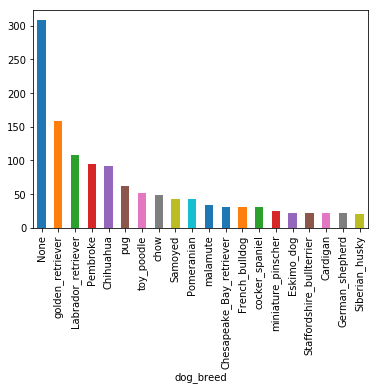

In [46]:
# plot bar chart of dog_breed (counting each breed with groupby), against favourite_count - limit bins to 20 dog_breeds
twitter_archive_clean.groupby('dog_breed').count()['favorite_count'].sort_values(ascending=False).nlargest(20).plot(kind='bar')

In [47]:
# remove dog_breeds with None entries
twitter_archive_clean.loc[twitter_archive_clean['dog_breed']=='None','dog_breed'] = None

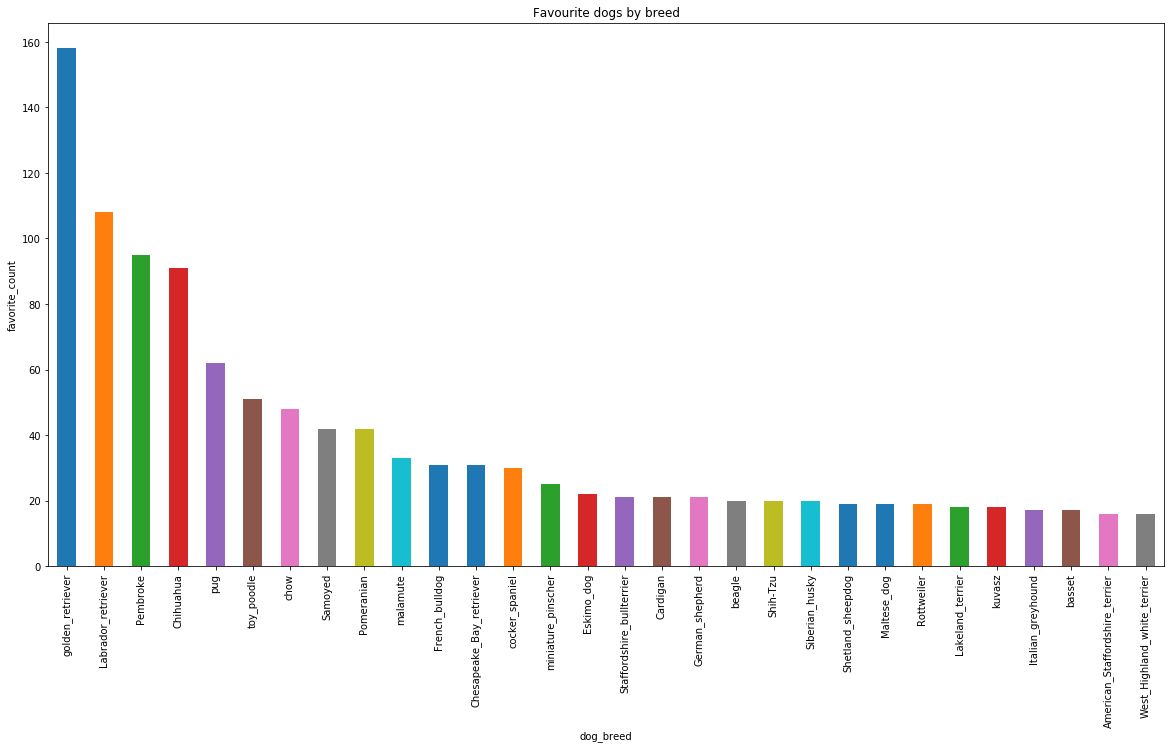

In [48]:
# set plot to larger size, increase dog_breads to 30
fig = plt.figure(figsize=(20,10))
twitter_archive_clean.groupby('dog_breed').count()['favorite_count'].sort_values(ascending=False).nlargest(30).plot(kind='bar')
# add y axis and title
plt.ylabel("favorite_count")
plt.title('Favourite dogs by breed');

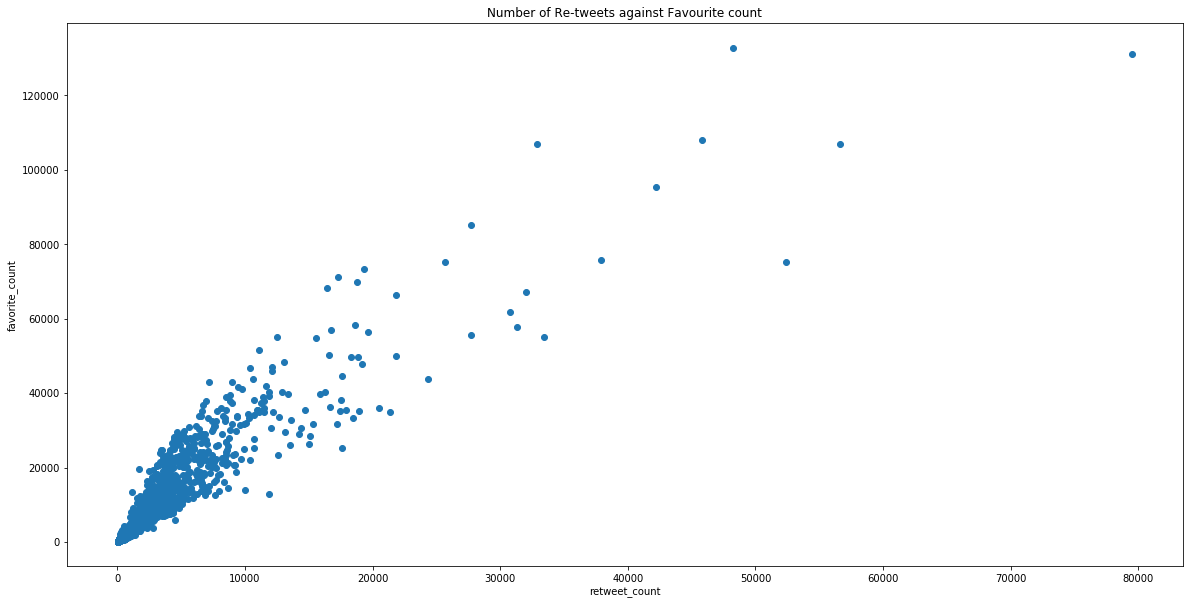

In [49]:
# create scatter plot of retweet_count vs favorite_count
fig = plt.figure(figsize=(20,10))
plt.scatter(twitter_archive_clean.retweet_count, twitter_archive_clean.favorite_count)
plt.ylabel("favorite_count")
plt.xlabel("retweet_count")
plt.title('Number of Re-tweets against Favourite count');

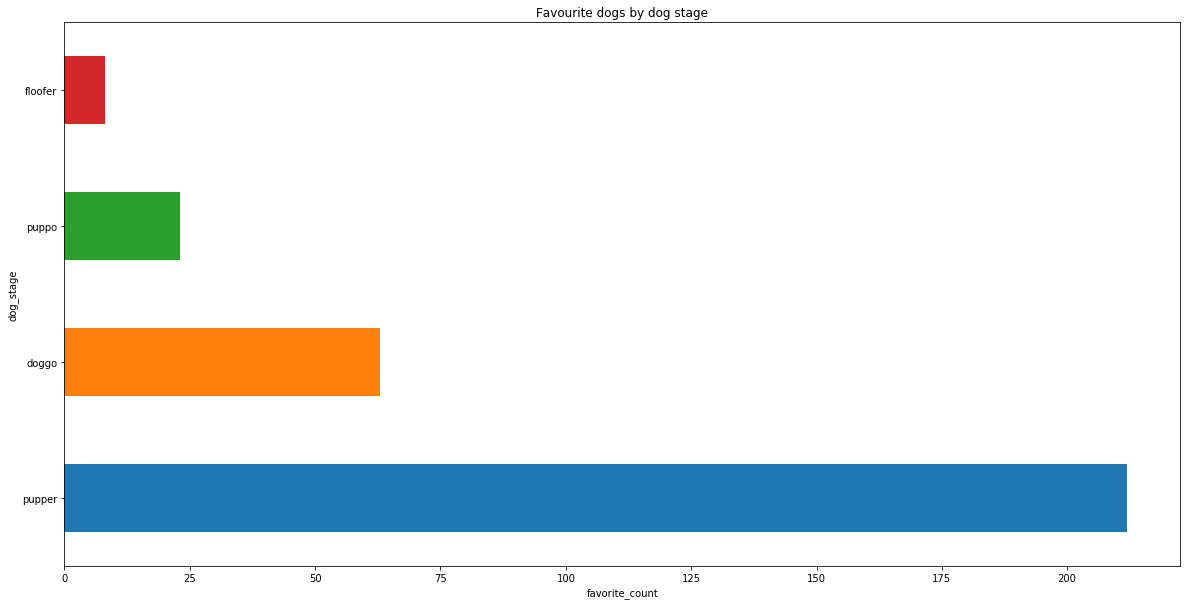

In [53]:
# remove dog_stage with None entries
twitter_archive_clean.loc[twitter_archive_clean['dog_stage']=='None','dog_stage'] = None

fig = plt.figure(figsize=(20,10))
twitter_archive_clean.groupby('dog_stage').count()['favorite_count'].sort_values(ascending=False).nlargest(4).plot(kind='barh')
# add y axis and title
plt.xlabel("favorite_count")
plt.title('Favourite dogs by dog stage');

 ## Insights

**We can see from the above 'Favourite dogs by breed' plot, the most favoured dog on WeRateDogs is the Golden Retriever, followed by the Labrador, Pembroke, and Chihuahua making up the others in the top four.**

**The scatter plot of 'Number of re-tweets against favourite count', shows a clear positive correlation between the favourite count and the number of corresponding re-tweets.**

**The 'Favourite dogs by dog stage' plot shows a clear preference of younger ‘puppers’ to all other dog stages.**

**Please also see the *act_report.pdf* document**